<a href="https://colab.research.google.com/github/shresth97/ML_repo/blob/main/GRIP_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/SampleSuperstore.csv")

In [3]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
dataset.shape

(9994, 13)

#Checking the types of Data in each column 

In [6]:
Dataset = dataset.dtypes
Dataset

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

##Checking the presence of missing values in our data 

In [7]:
dataset.isnull()
dataset.isna().apply(pd.value_counts)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
False,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994


##5 Point Summary of our Dataset

In [8]:
print(dataset["Profit"].max())
print(dataset["Profit"].min())

8399.976
-6599.978


In [9]:
print(dataset["Sales"].max())
print(dataset["Sales"].min())

22638.48
0.444


In [10]:
print(dataset["Quantity"].max())
print(dataset["Quantity"].min())

14
1


In [11]:
print(dataset["Discount"].max())
print(dataset["Discount"].min())

0.8
0.0


In [12]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


##Checking for Duplicates

In [13]:
dataset.duplicated().sum()

17

17 dublicates are present which means 0.17% of the dataset. So we can drop these Duplicates

##Dropping the Dublicates 

In [14]:
dataset = dataset.drop_duplicates()
print(dataset.duplicated().sum())

0


Duplicates succesfully removed

In [15]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


After removing duplicates we have 9977 rows left
whereas before we had 9994 rows but after removing duplicates :
9994-17 = 9977 rows

In [16]:
dataset["Country"]

0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
9989    United States
9990    United States
9991    United States
9992    United States
9993    United States
Name: Country, Length: 9977, dtype: object

##To check the Unique no. of rows in each column

In [17]:
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

*   We can see that all products are getting shipped in just 1 
Country i.e. United States. Simply put, the data is for only one country. So, we can remove the country column  
*   Our data covers the Sales of 531 Cities in 49 States divided into 4 Regions




In [18]:
dataset = dataset.drop("Country", axis= 1)  #axis=1 (or axis='columns') is vertical axis. To take it further, 
                                                     #if you use pandas method drop, to remove columns or rows, 
                                                     #if you specify axis=1 you will be removing columns. 
                                                     #If you specify axis=0 you will be removing rows from dataset.

In [19]:
dataset.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


'Country' column successfully removed




Every city has different Postal Codes, So let's drop one of the two columns

In [20]:
##DOUBT in why are we dropping Postal code column because when we print correlation between 
#Sales, Discountz, quantity, profit 

##**New Dataset after dropping Postal Code Column:**

In [21]:
new_dataset = dataset.drop("Postal Code", axis= 1)
new_dataset.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


##**Exploring columns "City", "State", "Region", "Postal Code"**

In [22]:
new_dataset["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

As we can see, there are 4 Regions. Looking at the data we can see that we have 3 categorical variables, which are related to each other in some way 

*   City :- Having most number of unique values 
*   State :- Having some number of unique values
*   List :- Having only 4 Unique values 



In [23]:
print(new_dataset["Category"].unique())
print(new_dataset["Sub-Category"].unique())

['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


##**Correlation Check**

In [24]:
#attributes = ['Sales','Quantity', 'Discount', 'Profit']
correlation_matrix = new_dataset.corr()
correlation_matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


##**Plotting Correlation Matrix**

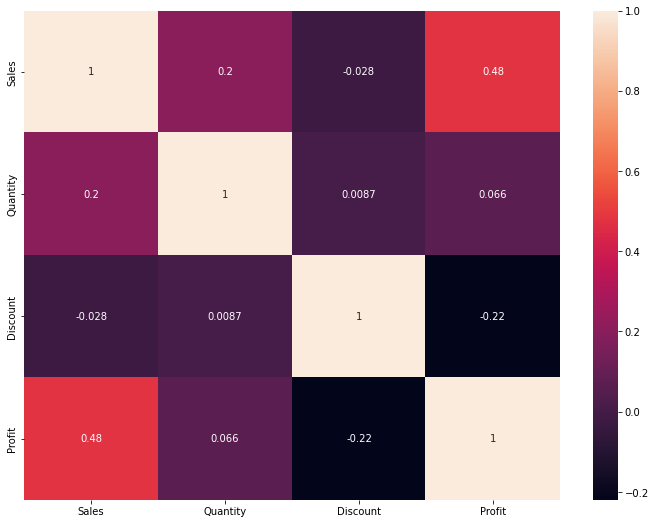

In [25]:
plt.subplots(figsize = (12,9))
sns.heatmap(correlation_matrix, annot= True)
plt.show()

It seems the Sales and Profit are highly correlated

From this conclusion let's plot a scatter plot of these columns

##**Sales v/s Profit**

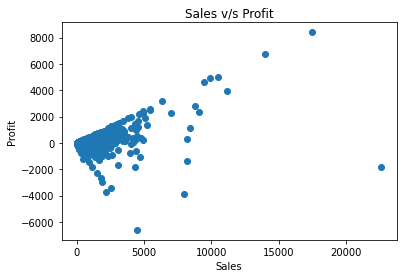

In [26]:
plt.scatter(new_dataset["Sales"], new_dataset["Profit"])
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales v/s Profit")
plt.show()

At lower Sales, Buisness either gets Profit or Loss, But when Sales are high. Business mostly gets Profit 

##**Plotting Sales v/s Profit statewise**

In [27]:
profit_to_sales = pd.DataFrame(new_dataset.groupby("State").sum()[["Profit", "Sales"]])
profit_to_sales["Profit_to_Sales"] = profit_to_sales["Profit"]/profit_to_sales["Sales"]
profit_to_sales.sort_values(by= 'Profit_to_Sales', inplace= True, ascending= False)
print("Highest 10 Ratios :\n")
print(profit_to_sales[:10])
print('='*70)
print("Lowest 10 Ratios :\n")
print(profit_to_sales[-10:])

Highest 10 Ratios :

                          Profit      Sales  Profit_to_Sales
State                                                       
District of Columbia   1059.5893   2865.020         0.369837
Delaware               9977.3748  27451.069         0.363460
Minnesota             10823.1874  29863.150         0.362426
Maine                   454.4862   1270.530         0.357714
Arkansas               4008.6871  11678.130         0.343264
Indiana               18382.9363  53555.360         0.343251
Georgia               16250.0433  49095.840         0.330986
Montana                1833.3285   5589.352         0.328004
Rhode Island           7285.6293  22627.956         0.321975
Michigan              24428.0903  75879.644         0.321932
Lowest 10 Ratios :

                    Profit        Sales  Profit_to_Sales
State                                                   
Florida         -3399.3017   89473.7080        -0.037992
Oregon          -1194.0993   17420.7820        -0.068545



*   Columbia has the highest profit to sales ratio
*   Ohio has the lowest profit to sales ratio
*   The states, New york, California are still not in the top 10 so means there is still room for some cleaning.






##**Region-wise Analysis**

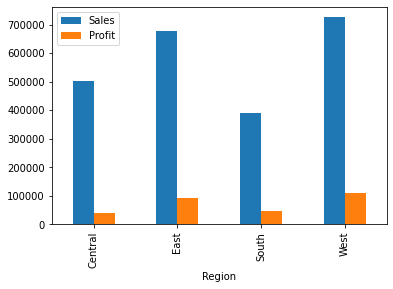

In [28]:
pd.DataFrame(new_dataset.groupby("Region").sum()[["Sales", "Profit"]]).plot(kind= "bar")




*   Western and Eastern region shows higher Sales and Profit as compared to Southern and Central regions 
*   Central region sales are higher than Southern region but the profit in southern region is shown higher than the profit in Central Region




##**State-wise Analysis**

###**Top 10 state with the maximum number of items Sold**


In [29]:
new_dataset.groupby("State").count()['Quantity'].sort_values(ascending= False)[:10]

State
California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: Quantity, dtype: int64

###**Top 10 States with minimum number of items sold**

In [30]:
new_dataset.groupby("State").count()["Quantity"].sort_values()[:10]

State
Wyoming                  1
West Virginia            4
North Dakota             7
Maine                    8
District of Columbia    10
Vermont                 11
South Dakota            12
Montana                 15
Idaho                   21
Kansas                  24
Name: Quantity, dtype: int64

##**Total Statewise Sales in Descending order**

In [35]:
state_wise_sales = pd.DataFrame(new_dataset.groupby("State").sum()["Sales"]).sort_values(by= "Sales", 
ascending = False)
state_wise_sales.reset_index(inplace = True)
state_wise_sales.head()

,State,Sales
0,California,457576.2715
1,New York,310827.1510
2,Texas,170124.5418
3,Washington,138560.8100
4,Pennsylvania,116496.3620


##**Top 10 Stores with maximum and minimum amount of Sales**

In [37]:
print("States with maximum number of sales : \n", state_wise_sales[:10])
print('\n', '='*50, '\n')
print("States with minimum number of sales : \n", state_wise_sales[-10:])

States with maximum number of sales : 
           State        Sales
0    California  457576.2715
1      New York  310827.1510
2         Texas  170124.5418
3    Washington  138560.8100
4  Pennsylvania  116496.3620
5       Florida   89473.7080
6      Illinois   80162.5370
7          Ohio   77976.7640
8      Michigan   75879.6440
9      Virginia   70636.7200


States with minimum number of sales : 
                    State     Sales
39            New Mexico  4783.522
40                  Iowa  4579.760
41                 Idaho  4382.486
42                Kansas  2914.310
43  District of Columbia  2865.020
44               Wyoming  1603.136
45          South Dakota  1315.560
46                 Maine  1270.530
47         West Virginia  1209.824
48          North Dakota   919.910


The business should focus more on these 10 states which have lease amount of sales

##**Top 10 States with maximum and minimum amount of profit**

In [44]:
print("States with maximum amount of profit \n", new_dataset.groupby("State").sum()["Profit"].
      sort_values(ascending = False)[:10])

print('\n', "="*50, '\n')

print("States with minimum amount of profit \n", new_dataset.groupby("State").sum()['Profit'].
      sort_values(ascending= False)[-10:])

States with maximum amount of profit 
 State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


States with minimum amount of profit 
 State
Oregon            -1194.0993
Florida           -3399.3017
Arizona           -3427.9246
Tennessee         -5341.6936
Colorado          -6527.8579
North Carolina    -7490.9122
Illinois         -12601.6500
Pennsylvania     -15565.4035
Ohio             -16959.3178
Texas            -25750.9833
Name: Profit, dtype: float64




*   It is pretty clear that last 10 states are going in loss instead of profit especially the state Texas.
*   Buisness should focus more on the these last 10 states which are going in loss.
*   They should analyze their resource usage and the categories which are being sold in those states






##**New DataFrame having only States and Regions**

In [50]:
state_region = new_dataset[["State", "Region"]]

####**Dropping Duplicated Data**

In [51]:
state_region.duplicated().sum()

9928

Thats a lot of Duplicate Data so we have to drop the Duplicate values

In [56]:
state_region = state_region.drop_duplicates()
state_region.duplicated().sum()

0

All the duplicate data has now been dealt with

##**Adding "Region" column to the "state_wise_sales" DataFrame**

In [71]:
state_wise_sales = pd.merge(state_wise_sales, state_region)
state_wise_sales.head()

,State,Sales,Region
0,California,457576.2715,West
1,New York,310827.1510,East
2,Texas,170124.5418,Central
3,Washington,138560.8100,West
4,Pennsylvania,116496.3620,East


##**Plotting Sales State wise**

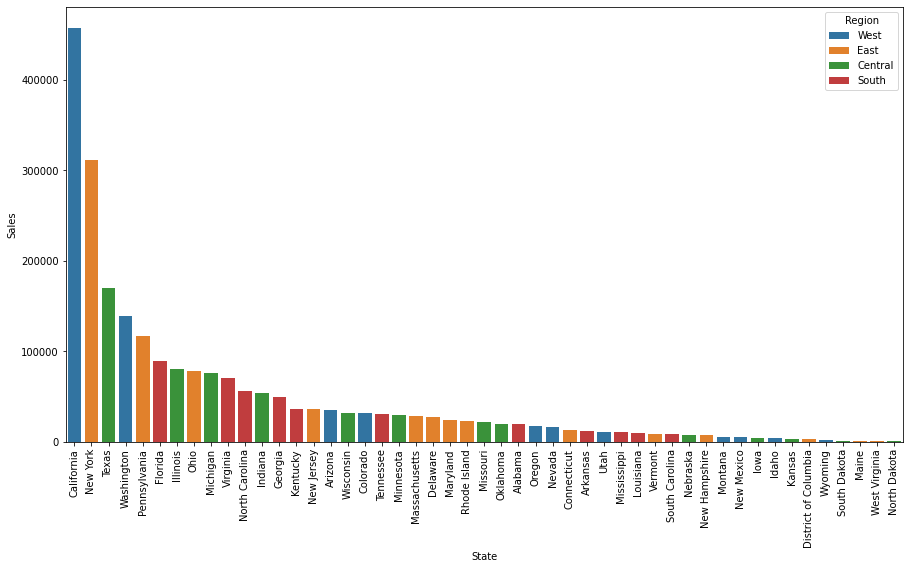

In [72]:
plt.figure(figsize = (15, 8))
ss= sns.barplot(x = 'State', y = 'Sales', data = state_wise_sales,hue = 'Region', dodge = False)
ss.set_xticklabels(ss.get_xticklabels(), rotation=90) #To get the names of states properly, if we
                        #don't use this then the state labels are all very conjested 
plt.show()



*   The company has the highest sales in the state of California which is in the west region and has the highest amount of sales i.e around 450k
*   New york is second to California in highest in sales for the company of around 300k
*   The States Texas and Washington are third and fourth in the chart with respect to sales which is around 160k and 140k correspondingly.
*   Maximum sales are done in west coast and east cost regions of United States 




